### Simple Linear Regression

Simple Linear Regression is a powerful tool for understanding and predicting how one variable influences another. Think of it as a method for unraveling the relationship between variables. This technique allows you to represent this relationship using a straight line on a graph.

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

Load dataset

In [4]:
df = pd.read_csv('score_updated.csv')

Preview data

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


Check missing value

In [7]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

EDA

In [9]:
df.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


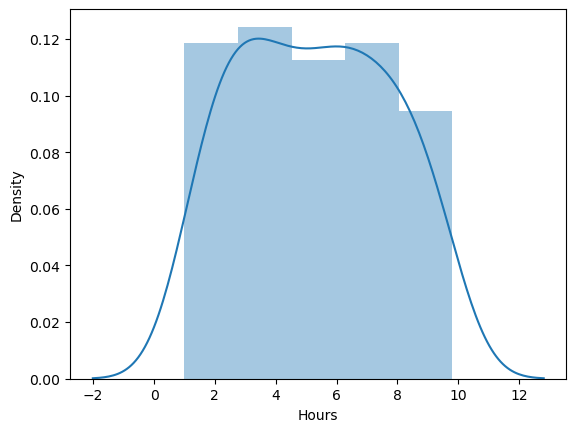

In [8]:
sns.distplot(df['Hours']);

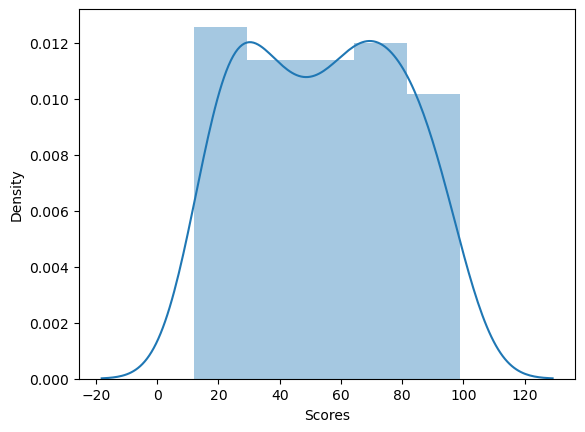

In [10]:
sns.distplot(df['Scores']);

Preprocessing modeling

In [11]:
X = df.drop(['Scores'],axis=1)
y = df['Scores']

Splitting Training and Test Set

In [12]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 1/3, random_state = 42)

Fitting Into Training

In [13]:
regressor = LinearRegression()

In [14]:
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
regressor.coef_

array([9.92115818])

Predict The Result

In [16]:
y_pred = regressor.predict(X_test)

Plot The Result

In [17]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})

In [18]:
result

,Actual,Predict
80,32,27.527098
77,51,50.345761
73,27,31.495561
94,37,38.440372
33,82,82.093468
...,...,...
95,84,81.101352
54,26,25.542866
43,37,38.440372
50,29,29.511329


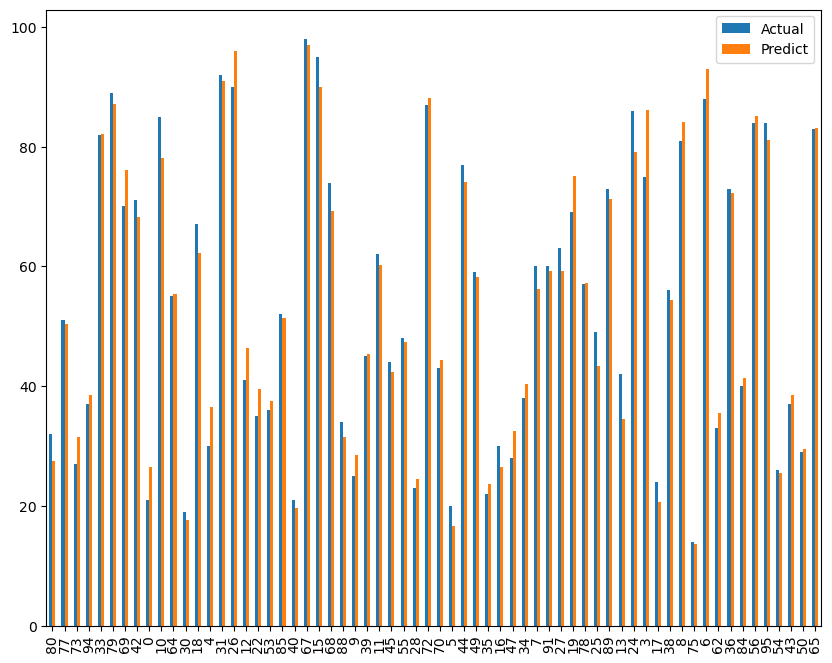

In [19]:
result.plot(kind = 'bar', figsize = (10,8))
plt.show()

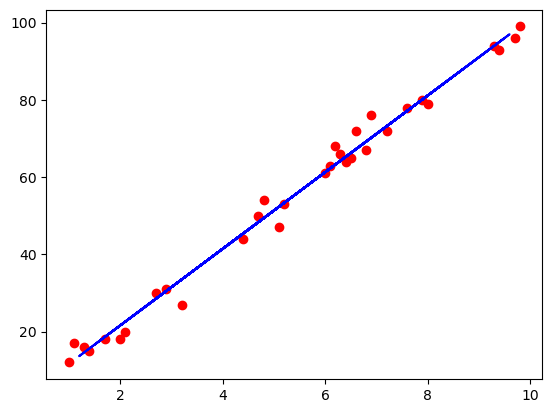

In [20]:
plt.scatter(X_train, y_train, color='red') 

plt.plot(X_test.values, y_pred, color='blue') 

plt.show()

Evaluate Model

In [21]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.671473954398864

In [22]:
mean_absolute_error(y_test, y_pred)

2.8732033846364335

In [23]:
mean_absolute_percentage_error(y_test, y_pred)

0.06486617111317773

In [24]:
r2_score(y_test, y_pred)

0.9765757745865518